In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [55]:
df=pd.read_csv('global-data-on-sustainable-energy.csv')
df=df.rename(columns={'Value_co2_emissions_kt_by_country':'CO2'})

In [56]:
#Perform shifting step on label column
year_prediction_window = 5

df = df.groupby("Entity")
entities = []
for entity_group in df.groups.keys():
    year_shifted_entity_group = df.get_group(entity_group)
    year_shifted_entity_group["CO2"] = year_shifted_entity_group["CO2"].shift(-1 * year_prediction_window)
    entities.append(year_shifted_entity_group)
df = pd.concat(entities)

C:\Users\CG\AppData\Local\Temp\ipykernel_14444\1521291556.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_shifted_entity_group["CO2"] = year_shifted_entity_group["CO2"].shift(-1 * year_prediction_window)


C:\Users\CG\AppData\Local\Temp\ipykernel_14444\2957663842.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Matrix=df.corr()
C:\Users\CG\AppData\Local\Temp\ipykernel_14444\2957663842.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt=".2f")


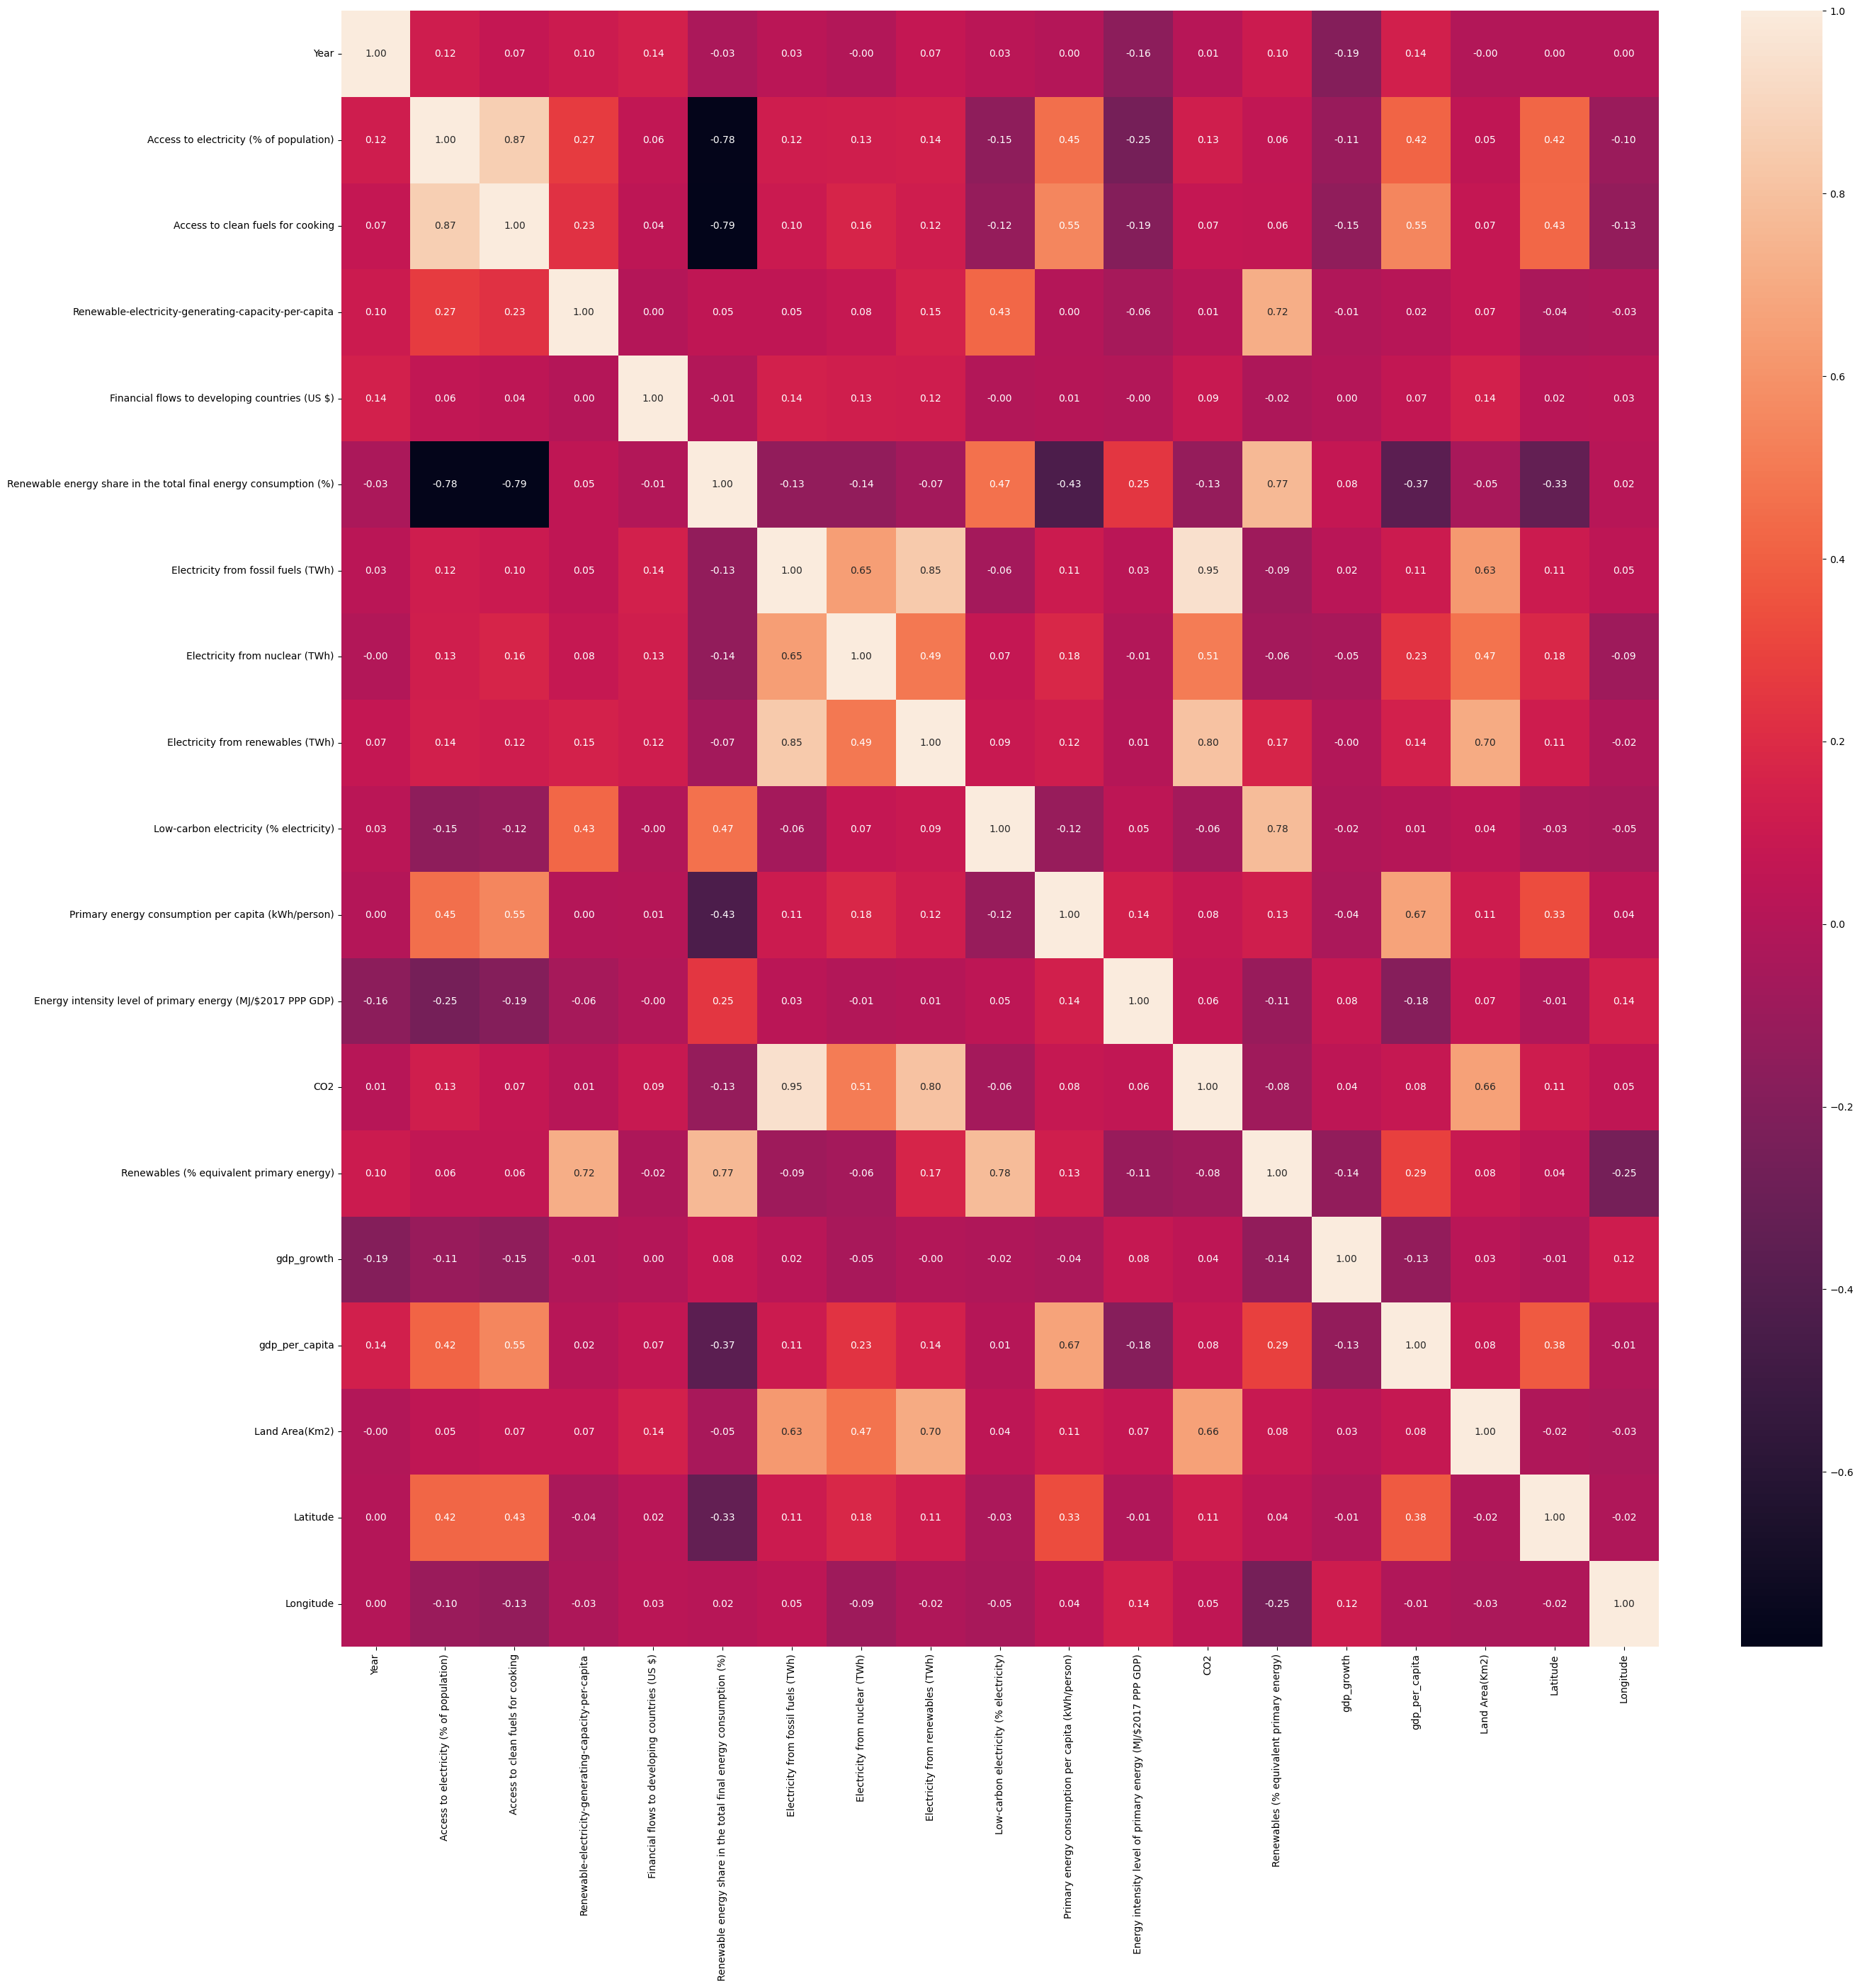

In [57]:
plt.figure(figsize=(30,30))
Corr_Matrix=df.corr()
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

In [58]:
print('Top 5 Most Positively Correlated to the Target Variable')
Corr_Matrix['CO2'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to the Target Variable


CO2                                    1.000000
Electricity from fossil fuels (TWh)    0.947938
Electricity from renewables (TWh)      0.804940
Land Area(Km2)                         0.657530
Electricity from nuclear (TWh)         0.505731
Name: CO2, dtype: float64

In [59]:
print('Top 5 Most Negatively Correlated to the Target Variable')
Corr_Matrix['CO2'].sort_values(ascending=True).head(5)

Top 5 Most Negatively Correlated to the Target Variable


Renewable energy share in the total final energy consumption (%)   -0.125959
Renewables (% equivalent primary energy)                           -0.081605
Low-carbon electricity (% electricity)                             -0.062627
Year                                                                0.014005
Renewable-electricity-generating-capacity-per-capita                0.014291
Name: CO2, dtype: float64

In [60]:
columns_to_drop = [col for col in Corr_Matrix.columns if abs(Corr_Matrix.loc['CO2', col]) < 0.5]
columns_to_drop
df = df.drop(columns_to_drop, axis=1)
df=df.dropna()

In [61]:
df.rename(columns={'Density\\n(P/Km2)': 'New_Density'}, inplace=True)
df['New_Density'] = df['New_Density'].str.replace(',', '').astype(int)
df.rename(columns={'Land Area(Km2)': 'Land'}, inplace=True)
df

,Entity,Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),CO2,New_Density,Land
0,Afghanistan,0.16,0.00,0.31,1.550000e+03,60,652230.0
1,Afghanistan,0.09,0.00,0.50,1.760000e+03,60,652230.0
2,Afghanistan,0.13,0.00,0.56,1.770000e+03,60,652230.0
3,Afghanistan,0.31,0.00,0.63,3.560000e+03,60,652230.0
4,Afghanistan,0.33,0.00,0.56,4.880000e+03,60,652230.0
5,Afghanistan,0.34,0.00,0.59,7.110000e+03,60,652230.0
6,Afghanistan,0.20,0.00,0.64,8.930000e+03,60,652230.0
7,Afghanistan,0.20,0.00,0.75,8.080000e+03,60,652230.0
8,Afghanistan,0.19,0.00,0.54,5.990000e+03,60,652230.0
9,Afghanistan,0.16,0.00,0.78,4.880000e+03,60,652230.0


In [62]:
le = LabelEncoder()
df.Entity = le.fit_transform(df.Entity)

In [63]:
X = df.drop(columns=['CO2'])
y = df['CO2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1852, 6)
X_test shape: (464, 6)
y_train shape: (1852,)
y_test shape: (464,)


In [64]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
}
best_model = None
best_r2 = 0

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)

    # Evaluate the model
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    submit = pd.DataFrame()
    submit['Actual CO2'] = y_test
    submit['Predict_CO2'] = y_pred
    submit = submit.reset_index()
    r2 = r2_score(y_test, y_pred)
    if r2 > best_r2:
        best_r2 = r2
        best_model = model.__class__.__name__

    print(f'{model_name}:')
    print(f'R2 Score: {r2:.2f}')
    print(f'Mean Absolute Error (MAE): {mae:.2f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(submit.head(5))

    print('----------------------------------------')
print(f"The best performing model is: {best_model} with accuracy: {best_r2:.2f}")

Linear Regression:
R2 Score: 0.94
Mean Absolute Error (MAE): 74081.56
Root Mean Squared Error (RMSE): 303200.45
   index     Actual CO2    Predict_CO2
0   1419     310.000002    1922.137451
1    842   27680.000310   47721.403348
2    136    5340.000153   21058.284731
3   1287  773070.007300  702982.051731
4    371     639.999986   17531.360026
----------------------------------------
Random Forest:
R2 Score: 0.97
Mean Absolute Error (MAE): 24147.44
Root Mean Squared Error (RMSE): 207557.43
   index     Actual CO2    Predict_CO2
0   1419     310.000002     263.856442
1    842   27680.000310   26952.099703
2    136    5340.000153    5704.699945
3   1287  773070.007300  747867.991974
4    371     639.999986     729.999990
----------------------------------------
The best performing model is: RandomForestRegressor with accuracy: 0.97
